In [173]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib


import shutil
import pandas as pd

In [174]:
#print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [ ]:
import os
for root, dirs, files in os.walk(train_dir):
    for name in files:
        print(os.path.join(root, name))
    for name in dirs:
        print(os.path.join(root, name))

In [180]:
shutil.rmtree("/Users/zy/Documents/CS5242/nus-cs5242/train_image/class", ignore_errors=True)
os.mkdir("/Users/zy/Documents/CS5242/nus-cs5242/train_image/class")
os.mkdir("/Users/zy/Documents/CS5242/nus-cs5242/train_image/class/0")
os.mkdir("/Users/zy/Documents/CS5242/nus-cs5242/train_image/class/1")
os.mkdir("/Users/zy/Documents/CS5242/nus-cs5242/train_image/class/2")

label = pd.read_csv("/Users/zy/Documents/CS5242/nus-cs5242/train_label.csv")
label_tupple = list(label.itertuples(index=False, name=None))

for i in range(len(label_tupple)):
    img_ext = str(label_tupple[i][0])
    img_class = str(label_tupple[i][1])
    
    shutil.copy("/Users/zy/Documents/CS5242/nus-cs5242/train_image/train_image/"+img_ext+".png", 
                "/Users/zy/Documents/CS5242/nus-cs5242/train_image/class/"+img_class+"/"+img_ext+".png")

data_dir=r"/Users/zy/Documents/CS5242/nus-cs5242/train_image/class"
data_dir = pathlib.Path(data_dir)

In [131]:
# specifiy data directories

#train_dir = r'C:\Users\zy\Documents\CS5242\nus-cs5242\train_image'
#test_dir = r'C:\Users\zy\Documents\CS5242\nus-cs5242\test_image'
#training_labels = pd.read_csv(r'C:\Users\zy\Documents\CS5242\nus-cs5242\train_label.csv')

In [132]:
# convert ID to string and resort the dataset based on new string ID
#training_labels.ID = training_labels.ID.astype(str)
#training_labels = training_labels.sort_values(by = 'ID') 

In [133]:
#training_labels['Label'].value_counts()

In [176]:
# convert training labels to tuples

#print(training_labels)
#train_labels = training_labels.to_records(index=False).tolist()
#train_labels = training_labels.Label.tolist()

In [233]:
# create tf datasets and load data, note: didn't use graysacle as all pretrained models over imagenet are RGB 
batch_size = 32
img_height = 512
img_width = 512
num_classes = 3

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  #labels=train_labels,
  #label_mode='int',
  #color_mode='grayscale',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names


Found 1164 files belonging to 3 classes.
Using 932 files for training.


In [182]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  #labels=train_labels,
  #color_mode='grayscale',
  #label_mode='int',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1164 files belonging to 3 classes.
Using 232 files for validation.


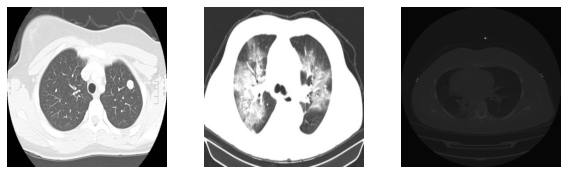

In [183]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_names[labels[i]])
        plt.axis("off")

In [184]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)

(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(32, 512, 512, 3)
(32,)
(4, 512, 512, 3)
(4,)


In [140]:
#for image_batch, labels_batch in train_ds:
#    print(labels_batch[0])

In [141]:
#for images, labels in train_ds:
#    plt.imshow(images[1])

In [185]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [186]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(4, 4)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [187]:
num_classes = 3

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()





Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_12 (Rescaling)     (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 512, 512, 16)      448       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 256, 256, 16)      0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 256, 256, 32)      4640      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 64, 64, 64)      

In [144]:
# Alex Net 
num_classes = 3

inputs = keras.Input(shape=(512, 512, 3)) 
x = keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = keras.layers.Conv2D(filters=64, kernel_size=11, strides=4, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=192, kernel_size=5, padding='same', activation='relu')(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation='relu')(x)
x = keras.layers.Dense(num_classes, activation='softmax')(x)
model = keras.Model(inputs=inputs, outputs=x)
# Take a look at the model summary
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 512, 512, 3)]     0         
_________________________________________________________________
rescaling_8 (Rescaling)      (None, 512, 512, 3)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 128, 128, 64)      23296     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 64, 64, 192)       307392    
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 192)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 32, 32, 384)     

In [146]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1),
              #optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [147]:
#model.summary()

In [188]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
30/30 [==============================] - 65s 2s/step - loss: 1.7176 - accuracy: 0.6567 - val_loss: 0.5109 - val_accuracy: 0.7371
Epoch 2/10
30/30 [==============================] - 63s 2s/step - loss: 0.3413 - accuracy: 0.8444 - val_loss: 0.3860 - val_accuracy: 0.8190
Epoch 3/10
30/30 [==============================] - 63s 2s/step - loss: 0.2096 - accuracy: 0.9120 - val_loss: 0.3881 - val_accuracy: 0.8060
Epoch 4/10
30/30 [==============================] - 63s 2s/step - loss: 0.1143 - accuracy: 0.9582 - val_loss: 0.4264 - val_accuracy: 0.8491
Epoch 5/10
30/30 [==============================] - 63s 2s/step - loss: 0.0510 - accuracy: 0.9807 - val_loss: 0.4432 - val_accuracy: 0.8578
Epoch 6/10
30/30 [==============================] - 63s 2s/step - loss: 0.0405 - accuracy: 0.9925 - val_loss: 0.5356 - val_accuracy: 0.8362
Epoch 7/10
30/30 [==============================] - 63s 2s/step - loss: 0.0213 - accuracy: 0.9968 - val_loss: 0.9869 - val_accuracy: 0.8103
Epoch 8/10
30/30 [==

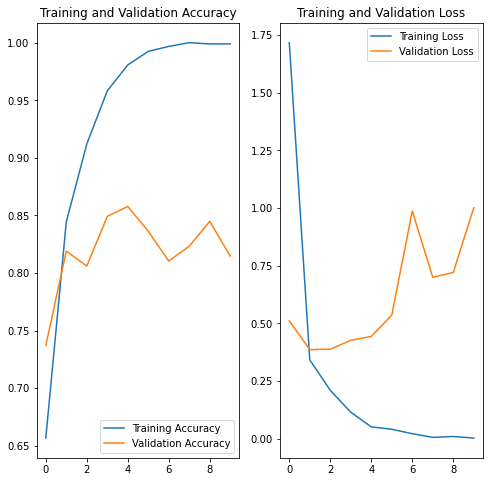

In [189]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [281]:
import os

output = []
    
test_folder = r'C:\Users\zy\Documents\CS5242\nus-cs5242\test_image\test_image'

for file in os.listdir(test_folder):
    filename = str(file).replace(".png","")
    image_path = os.path.join(test_folder, file)
    #print(filename, image_path)
    
    img = keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    label = class_names[np.argmax(score)]
    label = class_names[np.argmax(score)]

    output.append([filename, label])
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )
    

This image most likely belongs to 0 with a 94.86 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 0 with a 99.98 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 66.11 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 0 with a 98.42 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 0 with a 95.24 percent confidence.
This image most likely belongs to 0 with a 95.46 percent confidence.
This image most likely belongs to 1 with a 99.98 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belo

This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 0 with a 96.77 percent confidence.
This image most likely belongs to 0 with a 77.59 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 1 with a 86.69 percent confidence.
This image most likely belongs to 0 with a 99.99 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely b

This image most likely belongs to 0 with a 92.10 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 0 with a 99.90 percent confidence.
This image most likely belongs to 0 with a 91.79 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 0 with a 97.04 percent confidence.
This image most likely belongs to 1 with a 99.99 percent confidence.
This image most likely belongs to 1 with a 99.89 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely bel

In [246]:
results = pd.DataFrame(output, columns = ['ID' , 'Label']) 
results.ID = results.ID.astype(int)
results = results.sort_values(by="ID")

In [247]:
results.head()

,ID,Label
0,0,1
1,1,1
112,2,2
215,3,2
226,4,1


In [248]:
results.to_csv(r'C:\Users\zy\Documents\CS5242\nus-cs5242\submission_20201022.csv', index=False)

### Testing Another Method to Load Data 

In [192]:
from tensorflow.keras.preprocessing import image

img_path = r'C:\Users\zy\Documents\CS5242\nus-cs5242\train_image\train_image\0.png'
img = image.load_img(img_path, target_size=(512, 512, 1))
x = image.img_to_array(img)

In [193]:
x.shape

(512, 512, 3)

### Test transfer learning model ResNet50

In [264]:
# Create the base model from the pre-trained model MobileNet V2
#base_model = tf.keras.applications.MobileNetV2(input_shape=(512,512,3),
#                                               include_top=False,
#                                               weights='imagenet')


from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

base_model = ResNet50(input_shape=(512,512,3),
                                               include_top=False,
                                               weights='imagenet')


In [265]:
#preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
preprocess_input = tf.keras.applications.resnet50.preprocess_input

In [266]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 16, 16, 2048)


In [271]:
base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 140

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  175


In [272]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 512, 512, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_15[0][0]                   
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 256, 256, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [273]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 2048)


In [274]:
prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 3)


In [275]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.2, width_factor=0.2)
])

In [276]:
# construct model 

inputs = tf.keras.Input(shape=(512, 512, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [277]:
base_learning_rate = 0.0001
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
#              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#              metrics=['accuracy'])


model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [278]:
model.summary()


Model: "functional_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 512, 512, 3)]     0         
_________________________________________________________________
sequential_18 (Sequential)   (None, 512, 512, 3)       0         
_________________________________________________________________
tf_op_layer_strided_slice_5  [(None, 512, 512, 3)]     0         
_________________________________________________________________
tf_op_layer_BiasAdd_5 (Tenso [(None, 512, 512, 3)]     0         
_________________________________________________________________
resnet50 (Functional)        (None, 16, 16, 2048)      23587712  
_________________________________________________________________
global_average_pooling2d_4 ( (None, 2048)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 2048)            

In [279]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
30/30 [==============================] - 231s 8s/step - loss: 0.8330 - accuracy: 0.6245 - val_loss: 0.5403 - val_accuracy: 0.7457
Epoch 2/30
30/30 [==============================] - 230s 8s/step - loss: 0.4797 - accuracy: 0.7908 - val_loss: 0.5620 - val_accuracy: 0.7371
Epoch 3/30
30/30 [==============================] - 230s 8s/step - loss: 0.4302 - accuracy: 0.8047 - val_loss: 0.4237 - val_accuracy: 0.8060
Epoch 4/30
30/30 [==============================] - 230s 8s/step - loss: 0.3364 - accuracy: 0.8337 - val_loss: 0.5437 - val_accuracy: 0.7716
Epoch 5/30
30/30 [==============================] - 229s 8s/step - loss: 0.3271 - accuracy: 0.8509 - val_loss: 0.3991 - val_accuracy: 0.7974
Epoch 6/30
30/30 [==============================] - 229s 8s/step - loss: 0.3061 - accuracy: 0.8627 - val_loss: 0.4183 - val_accuracy: 0.8147
Epoch 7/30
30/30 [==============================] - 229s 8s/step - loss: 0.2603 - accuracy: 0.8755 - val_loss: 0.4413 - val_accuracy: 0.8147
Epoch 8/30
30

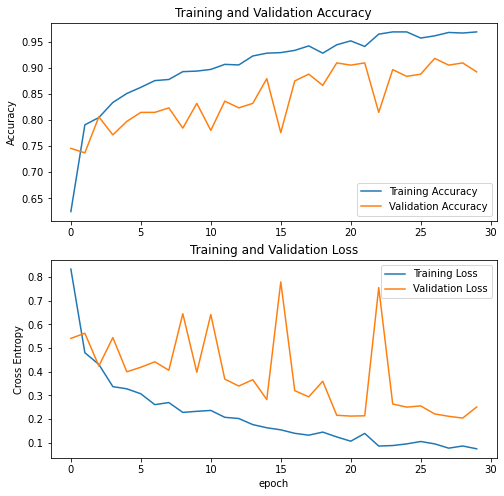

In [280]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [282]:
import os

output = []
    
test_folder = r'C:\Users\zy\Documents\CS5242\nus-cs5242\test_image\test_image'

for file in os.listdir(test_folder):
    filename = str(file).replace(".png","")
    image_path = os.path.join(test_folder, file)
    #print(filename, image_path)
    
    img = keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    label = class_names[np.argmax(score)]
    label = class_names[np.argmax(score)]

    output.append([filename, label])
    #print(
    #    "This image most likely belongs to {} with a {:.2f} percent confidence."
    #    .format(class_names[np.argmax(score)], 100 * np.max(score))
    #)
    

This image most likely belongs to 0 with a 94.86 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 0 with a 99.98 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 66.11 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 0 with a 98.42 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 0 with a 95.24 percent confidence.
This image most likely belongs to 0 with a 95.46 percent confidence.
This image most likely belongs to 1 with a 99.98 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belo

This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 0 with a 96.77 percent confidence.
This image most likely belongs to 0 with a 77.59 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 1 with a 86.69 percent confidence.
This image most likely belongs to 0 with a 99.99 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely b

This image most likely belongs to 0 with a 92.10 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 0 with a 99.90 percent confidence.
This image most likely belongs to 0 with a 91.79 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 1 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 0 with a 97.04 percent confidence.
This image most likely belongs to 1 with a 99.99 percent confidence.
This image most likely belongs to 1 with a 99.89 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely belongs to 2 with a 100.00 percent confidence.
This image most likely bel

In [283]:
results = pd.DataFrame(output, columns = ['ID' , 'Label']) 
results.ID = results.ID.astype(int)
results = results.sort_values(by="ID")

In [284]:
results.to_csv(r'C:\Users\zy\Documents\CS5242\nus-cs5242\submission_resnet50_v1_20201022.csv', index=False)

### VGG16

In [292]:
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout

import tensorflow.keras.utils

In [293]:
base_model = VGG16(input_shape=(512,512,3), 
                   include_top=False,
                   weights='imagenet')


In [299]:
#base_model.trainable = False

base_model.trainable = True

# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 16

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable =  False

Number of layers in the base model:  19


In [300]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 512, 512, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 512, 512, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 512, 512, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 256, 256, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 256, 256, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 256, 256, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 128, 128, 128)     0     

In [48]:
#model = keras.Sequential()
#model.add(base_model)
#model.add(Flatten())
#model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(3, activation="softmax"))

In [301]:
model = keras.Sequential([
    #layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes,activation="softmax") 
])

In [302]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 16, 16, 512)       14714688  
_________________________________________________________________
flatten_15 (Flatten)         (None, 131072)            0         
_________________________________________________________________
dense_35 (Dense)             (None, 256)               33554688  
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 3)                 771       
Total params: 48,270,147
Trainable params: 38,275,075
Non-trainable params: 9,995,072
_________________________________________________________________


In [303]:
base_learning_rate = 0.0001
#model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#              metrics=['accuracy'])

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [304]:
epochs=30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
30/30 [==============================] - 422s 14s/step - loss: 0.8851 - accuracy: 0.6663 - val_loss: 0.7989 - val_accuracy: 0.7500
Epoch 2/30
30/30 [==============================] - 425s 14s/step - loss: 0.7459 - accuracy: 0.8015 - val_loss: 0.7871 - val_accuracy: 0.7543
Epoch 3/30
30/30 [==============================] - 425s 14s/step - loss: 0.7264 - accuracy: 0.8230 - val_loss: 0.7979 - val_accuracy: 0.7543
Epoch 4/30
30/30 [==============================] - 429s 14s/step - loss: 0.6783 - accuracy: 0.8712 - val_loss: 0.7041 - val_accuracy: 0.8362
Epoch 5/30
30/30 [==============================] - 427s 14s/step - loss: 0.6738 - accuracy: 0.8755 - val_loss: 0.7290 - val_accuracy: 0.8233
Epoch 6/30
30/30 [==============================] - 427s 14s/step - loss: 0.6561 - accuracy: 0.8927 - val_loss: 0.7078 - val_accuracy: 0.8448
Epoch 7/30
30/30 [==============================] - 426s 14s/step - loss: 0.6488 - accuracy: 0.9002 - val_loss: 0.7070 - val_accuracy: 0.8362
Epoch 

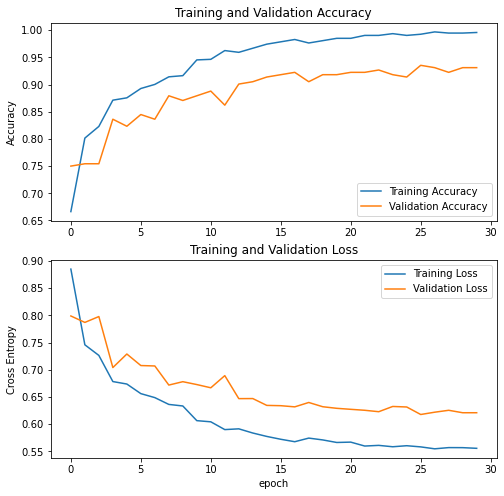

In [305]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
#plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
#plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [306]:
import os

output = []
    
test_folder = r'C:\Users\zy\Documents\CS5242\nus-cs5242\test_image\test_image'

for file in os.listdir(test_folder):
    filename = str(file).replace(".png","")
    image_path = os.path.join(test_folder, file)
    #print(filename, image_path)
    
    img = keras.preprocessing.image.load_img(image_path, target_size=(img_height, img_width))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    label = class_names[np.argmax(score)]
    label = class_names[np.argmax(score)]

    output.append([filename, label])
    #print(
    #    "This image most likely belongs to {} with a {:.2f} percent confidence."
    #    .format(class_names[np.argmax(score)], 100 * np.max(score))
    #)
    

In [307]:
results = pd.DataFrame(output, columns = ['ID' , 'Label']) 
results.ID = results.ID.astype(int)
results = results.sort_values(by="ID")

In [308]:
results.to_csv(r'C:\Users\zy\Documents\CS5242\nus-cs5242\submission_vgg16_tune_last_block_20201022.csv', index=False)